# starting point

In [1]:
# rerun if needed
# %pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
data = pd.read_csv('players.csv')
# all numeric columns
numeric_data = data.select_dtypes(include='number')
# players with zero appearances
players_zero_appearances = data[(data['appearances'] == 0) ]
# players with non zero appearances
players_non_zero_appearances = data[(data['appearances'] != 0) ]
# print (data.head())
print(data.columns.tolist())

['season', 'player_id', 'firstname', 'lastname', 'age', 'height', 'weight', 'appearances', 'lineups', 'minutes_played', 'position', 'rating', 'captain', 'substitutions_in', 'substitutions_out', 'bench_appearances', 'total_shots', 'shots_on_target', 'total_goals', 'assists', 'goals_conceded', 'saves', 'total_passes', 'key_passes', 'pass_accuracy', 'total_tackles', 'blocks', 'interceptions', 'total_duels', 'duels_won', 'dribble_attempts', 'successful_dribbles', 'dribbled_past', 'fouls_drawn', 'fouls_committed', 'yellow_cards', 'yellow_red_cards', 'red_cards', 'penalties_won', 'penalties_committed', 'penalties_scored', 'penalties_missed', 'penalties_saved']


### find nulls

In [2]:
# Count the number of missing values in each column
missing_values = data.isnull().sum()
# Filter and print only the columns with missing values greater than zero
non_zero_missing = missing_values[missing_values > 0]
print(non_zero_missing)

age          3
height     316
weight     608
rating    1195
dtype: int64


### Get the IDs where the rating is NaN


In [3]:
# Get the IDs where the rating is NaN
nan_rating_ids = data.loc[data['rating'].isnull(), 'player_id']
print("IDs of players with missing ratings:")
print(nan_rating_ids)

# Get the IDs where the height is NaN
nan_height_ids = data.loc[data['height'].isnull(), 'player_id']
print("\nIDs of players with missing heights:")
print(nan_height_ids)

# Get the IDs where the weight is NaN
nan_weight_ids = data.loc[data['weight'].isnull(), 'player_id']
print("\nIDs of players with missing weights:")
print(nan_weight_ids)

# Get the IDs where the age is NaN
nan_age_ids = data.loc[data['age'].isnull(), 'player_id']
print("\nIDs of players with missing ages:")
print(nan_age_ids)

IDs of players with missing ratings:
3        18934
4       284423
5       138864
20      204042
33        1458
         ...  
3248    382355
3262     19197
3266    288699
3267    284231
3268       635
Name: player_id, Length: 1195, dtype: int64

IDs of players with missing heights:
4       284423
5       138864
107     174926
121     231078
122     283273
         ...  
3201    394710
3241    361675
3244    293168
3248    382355
3267    284231
Name: player_id, Length: 316, dtype: int64

IDs of players with missing weights:
4       284423
5       138864
7       237124
22      130420
27      130421
         ...  
3244    293168
3248    382355
3249    278133
3255    284230
3267    284231
Name: player_id, Length: 608, dtype: int64

IDs of players with missing ages:
989     314661
1492    350627
1850    288115
Name: player_id, dtype: int64


# List of specific columns to plot   -  trying to find problematic values

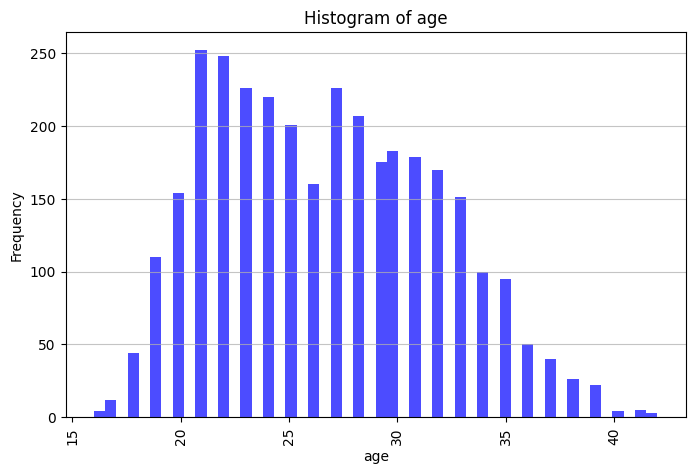

) missing from current font.ng\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


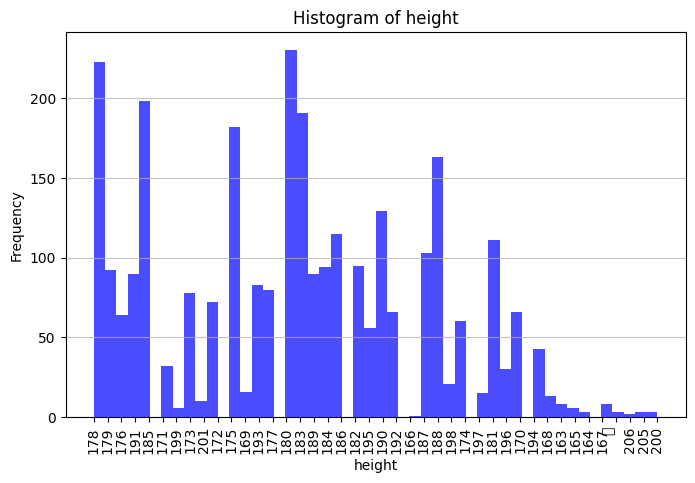

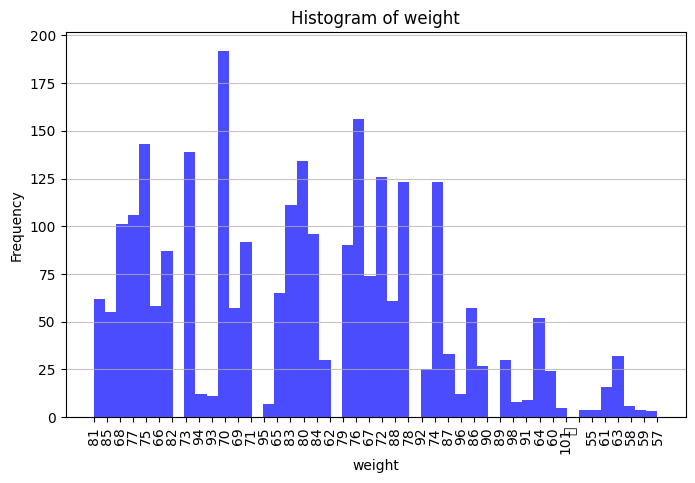

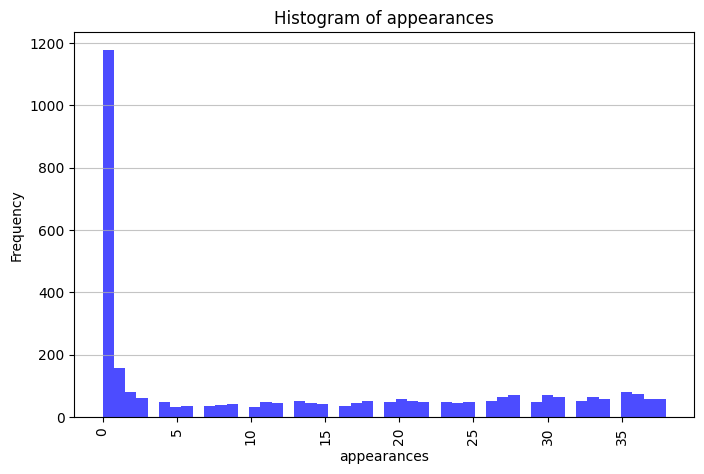

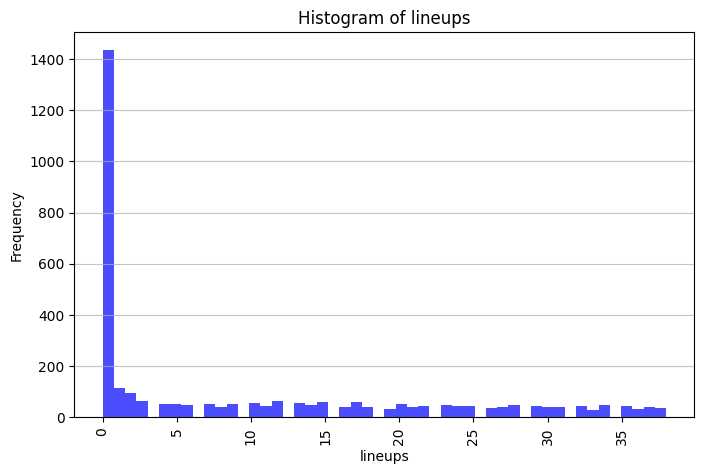

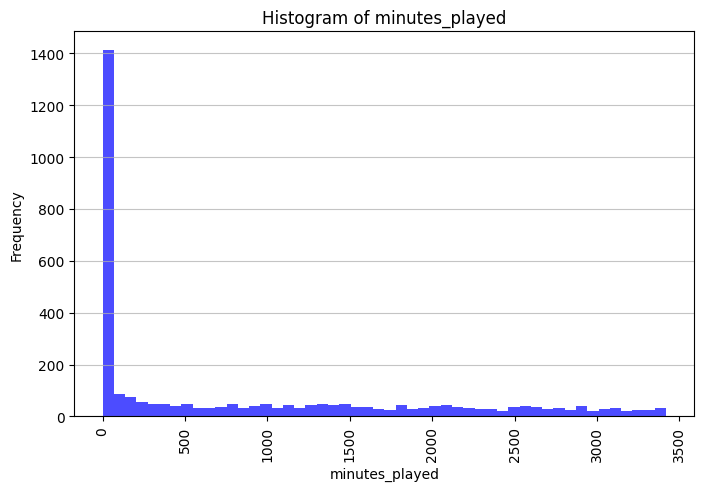

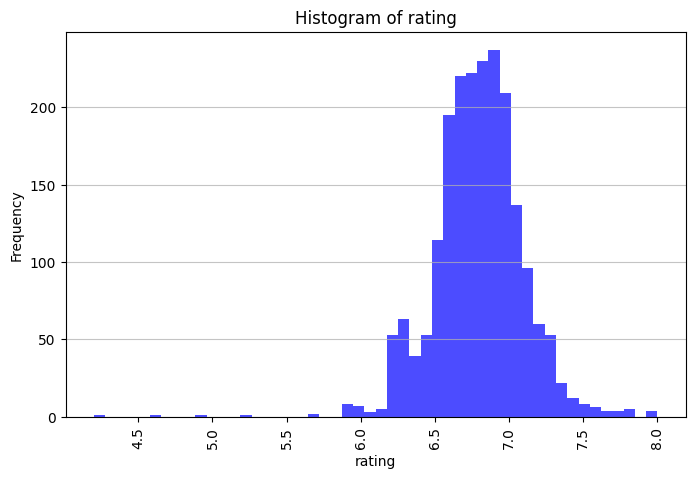

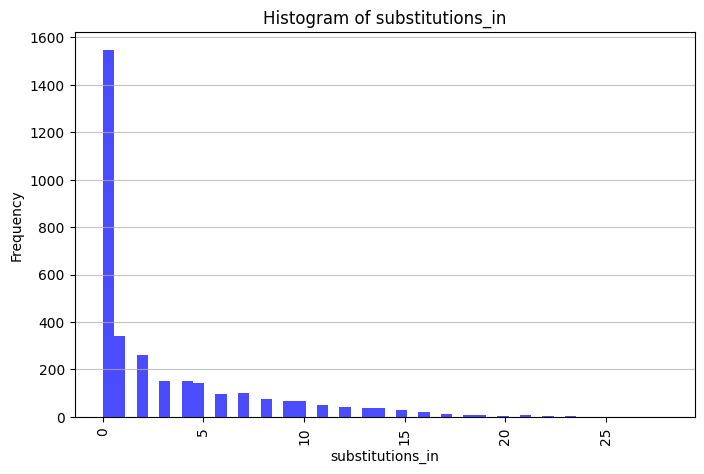

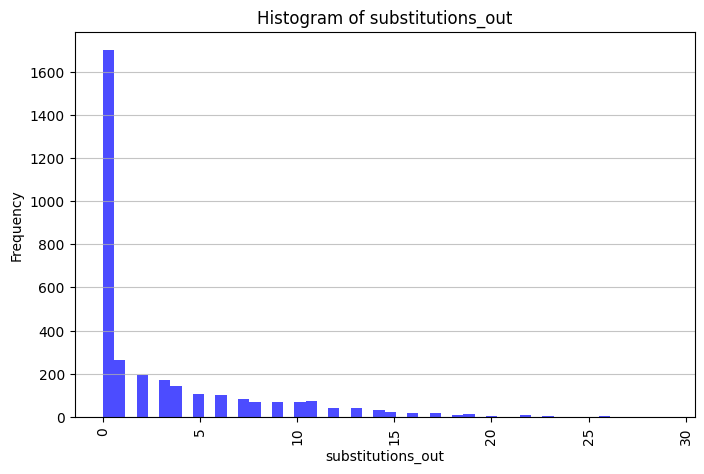

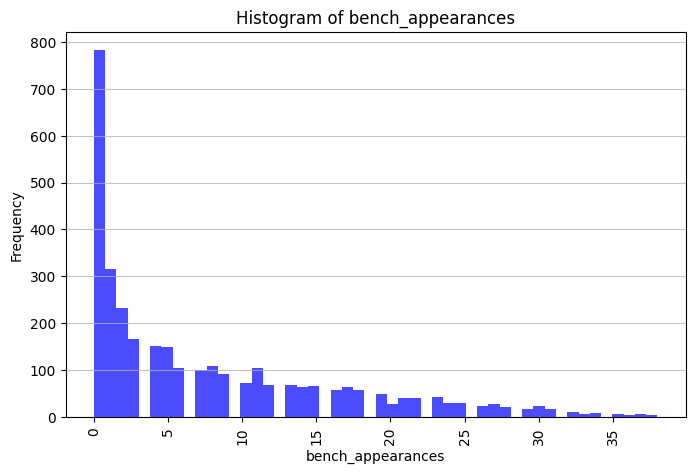

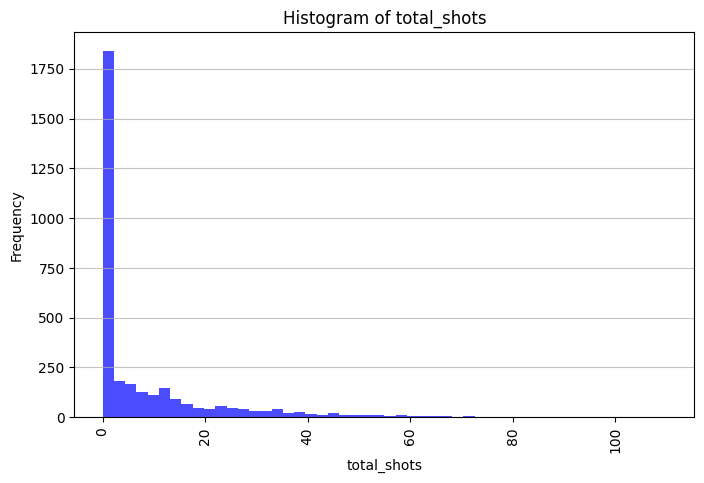

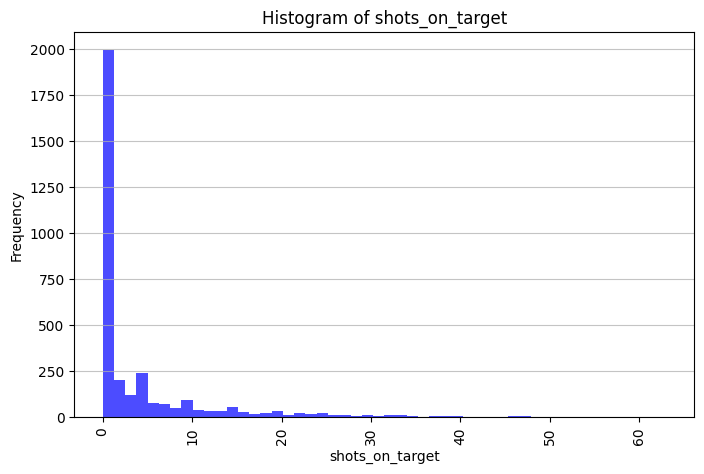

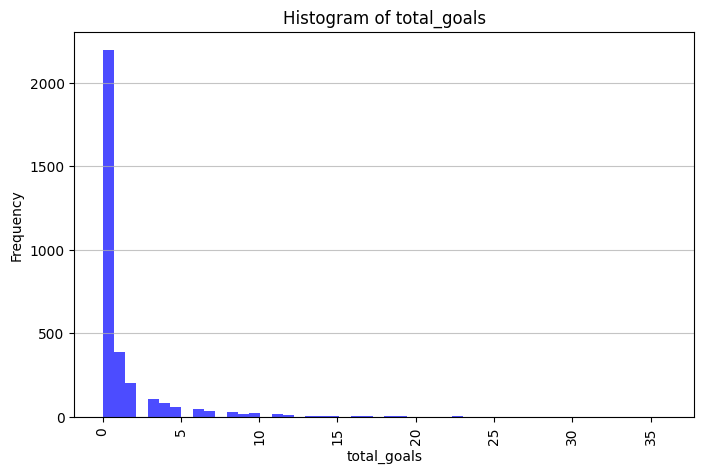

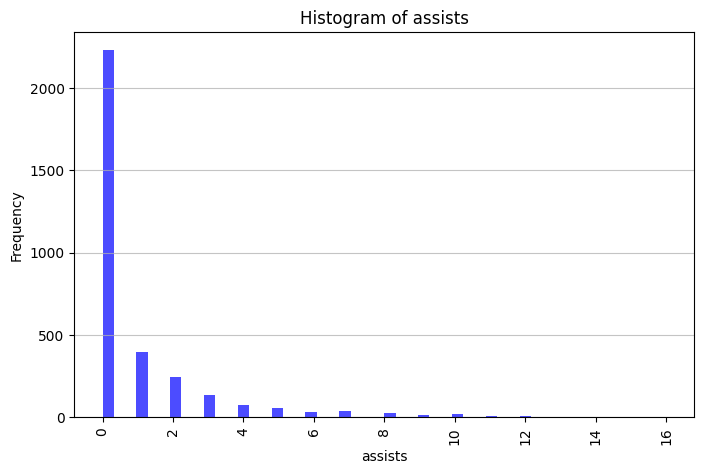

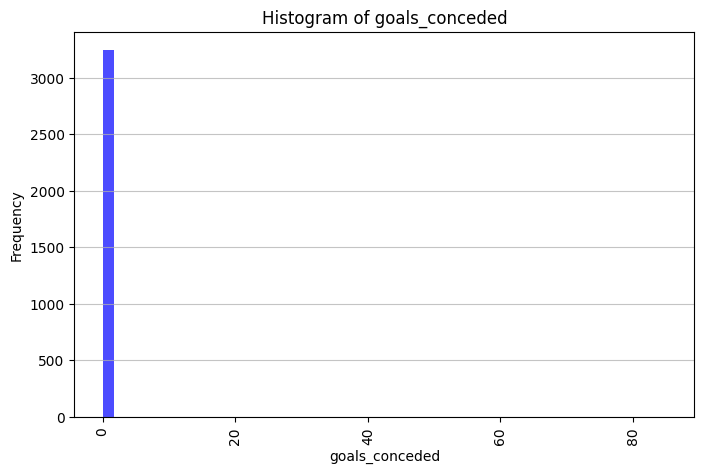

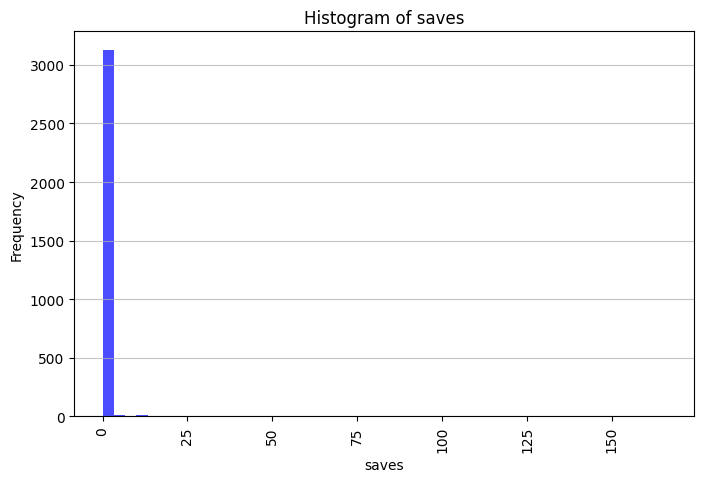

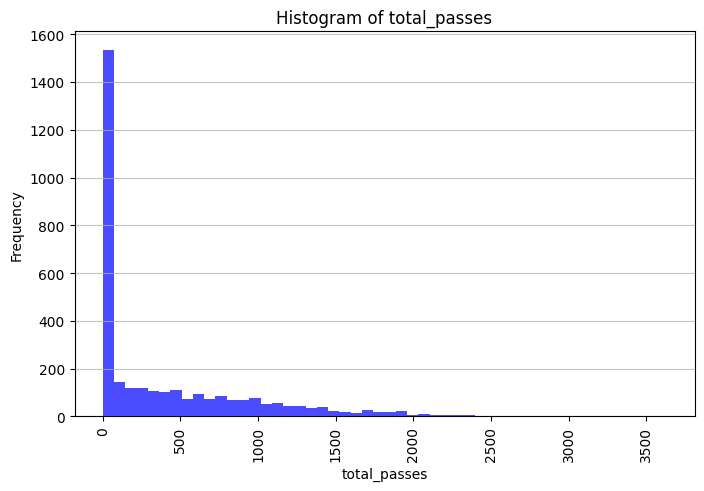

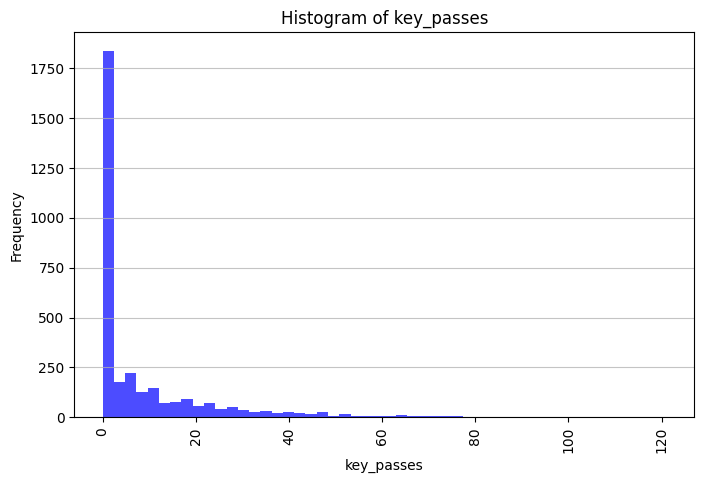

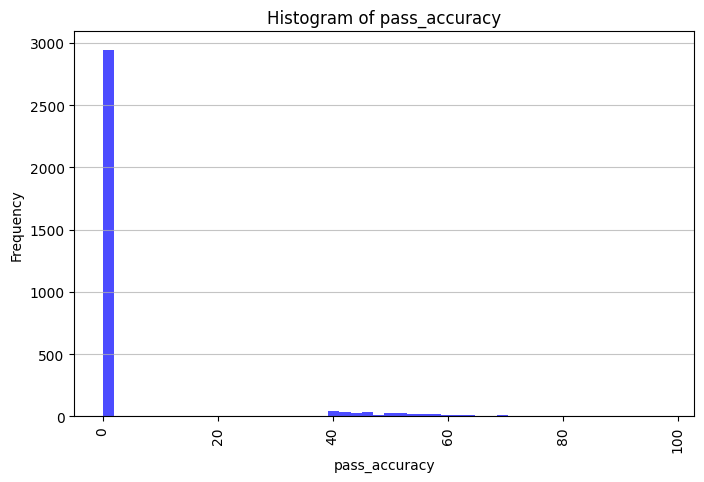

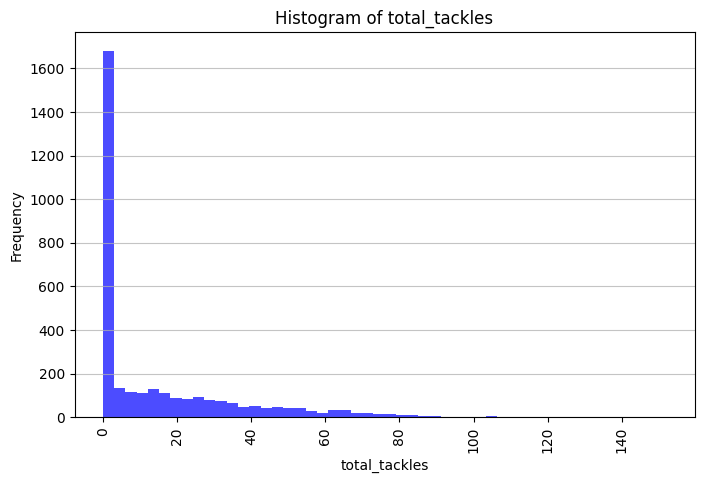

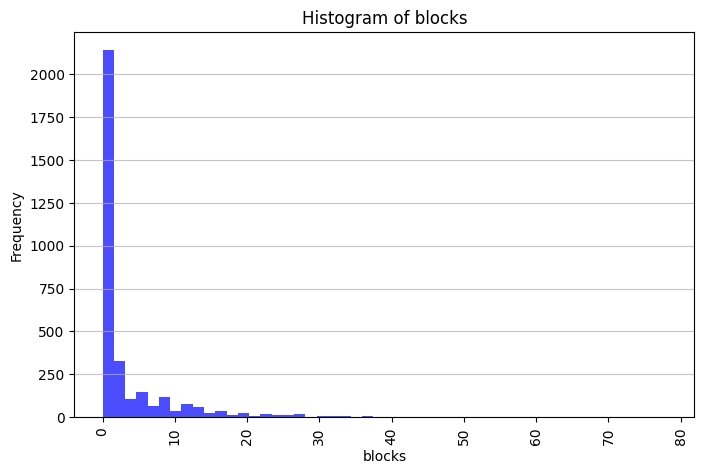

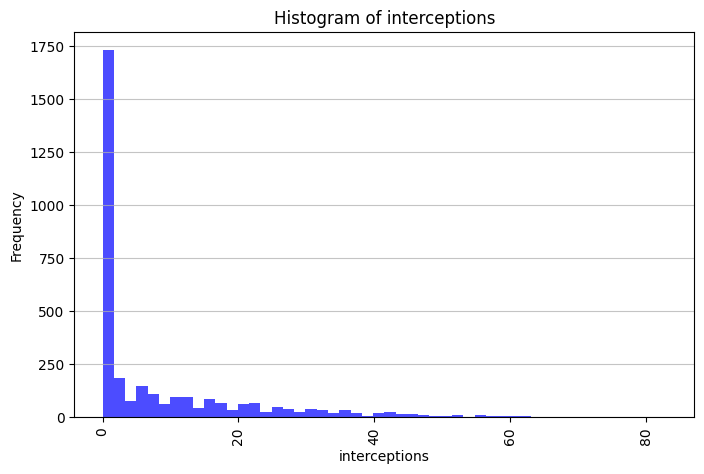

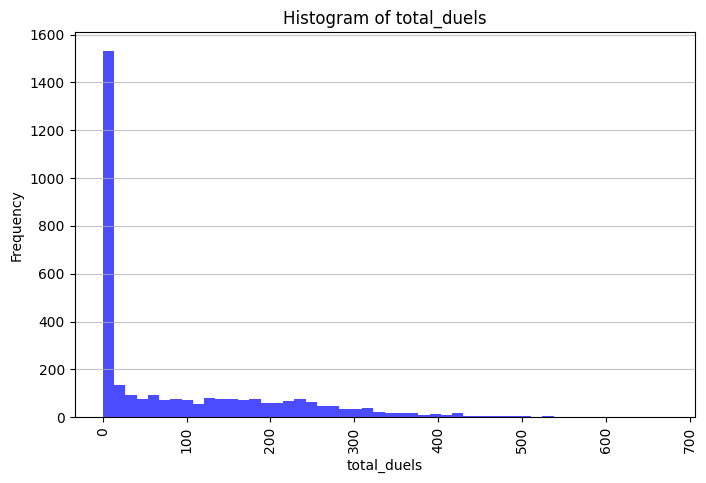

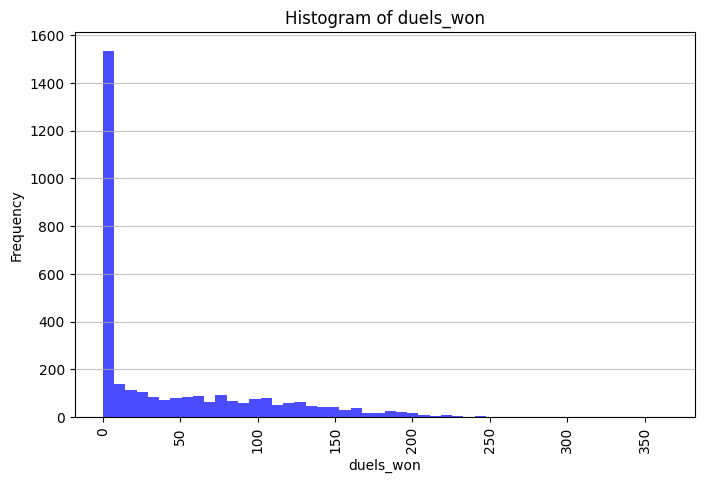

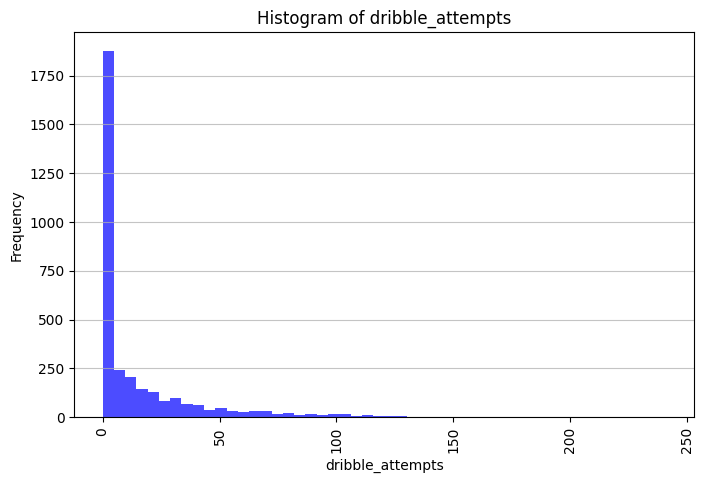

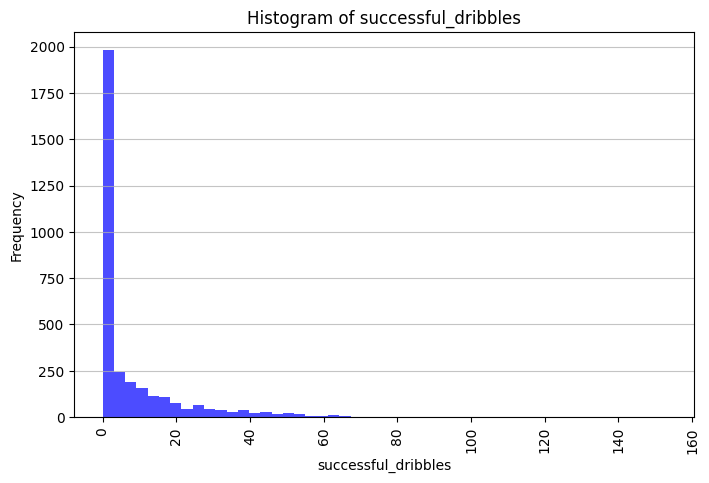

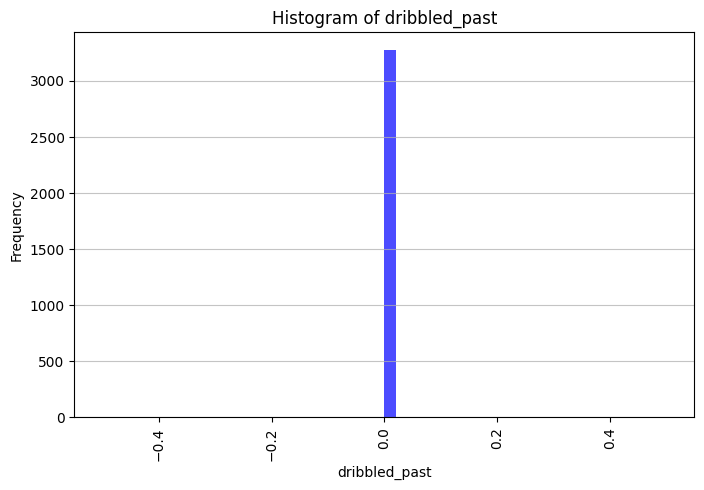

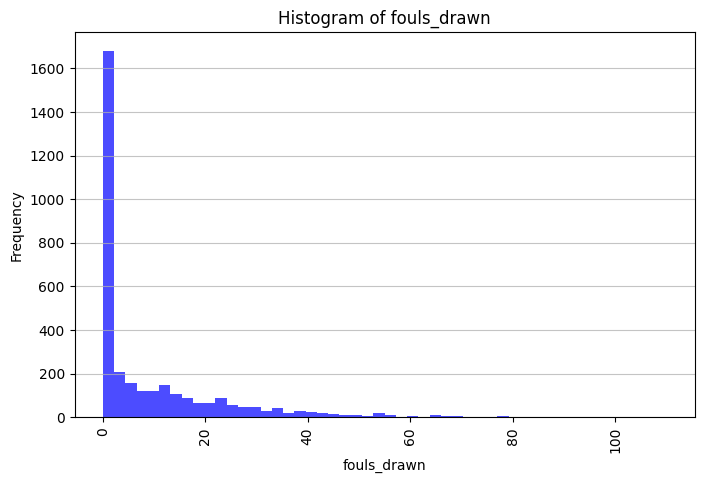

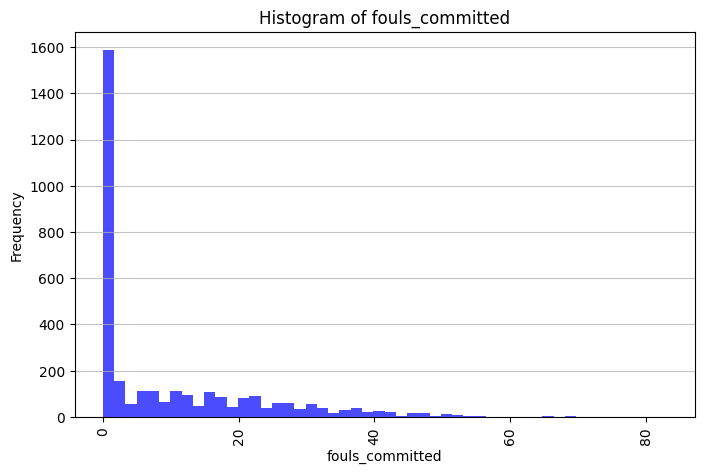

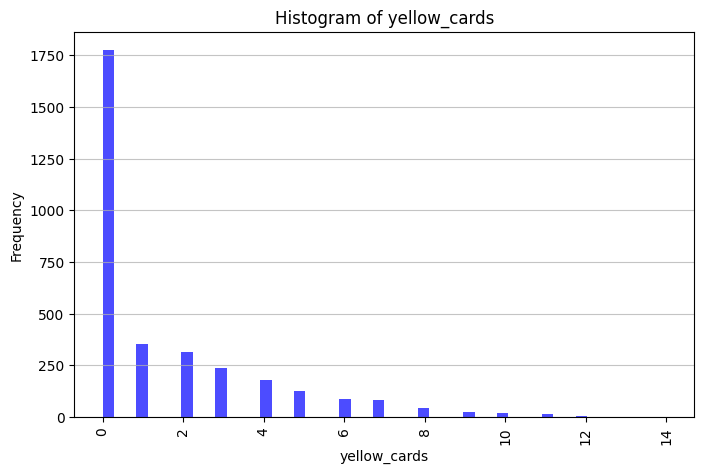

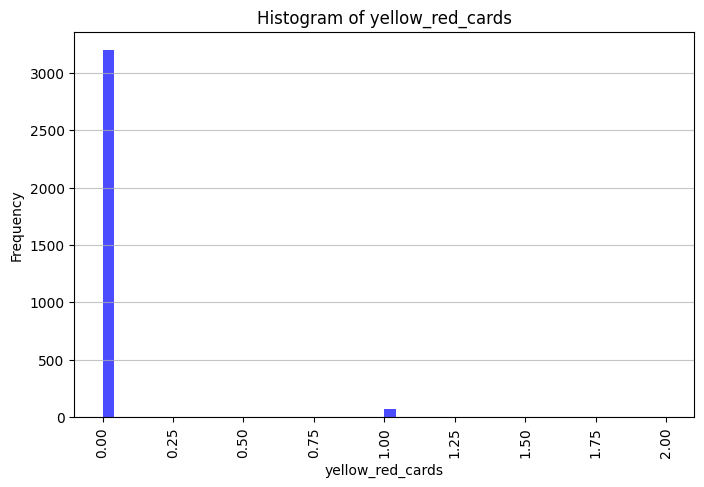

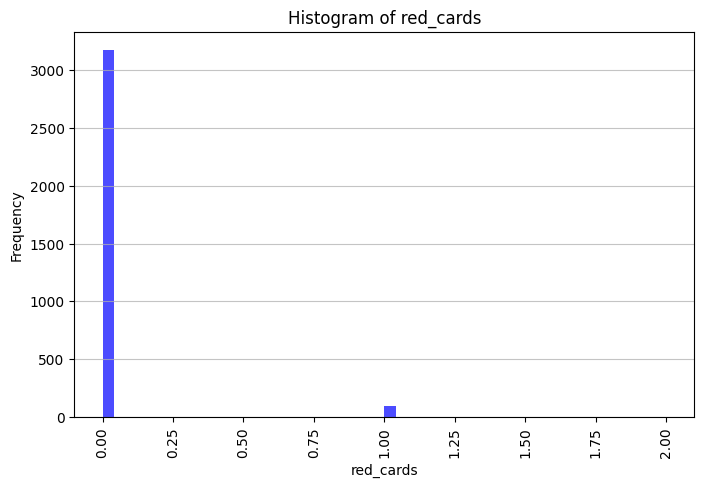

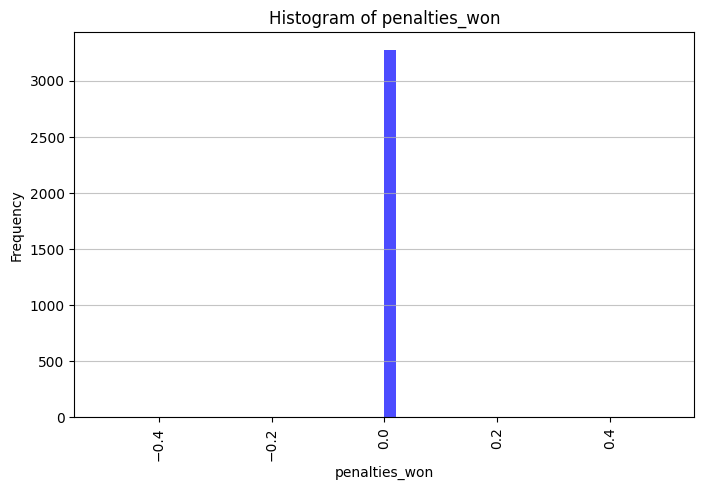

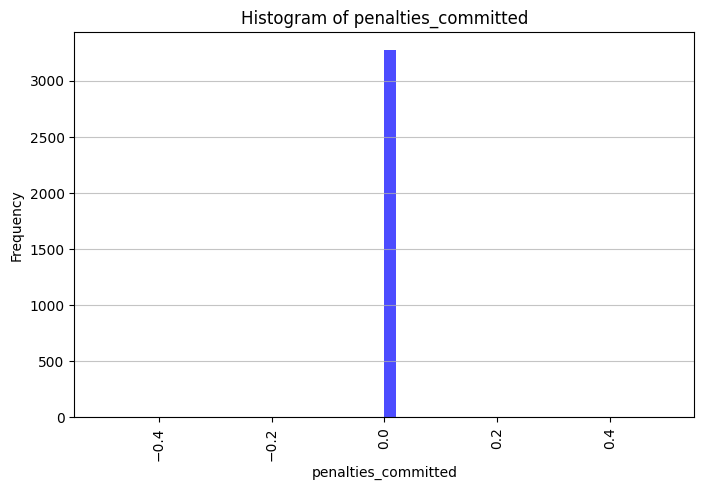

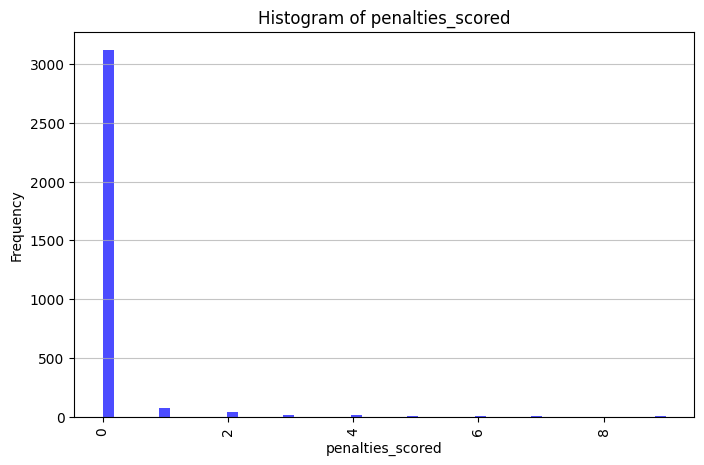

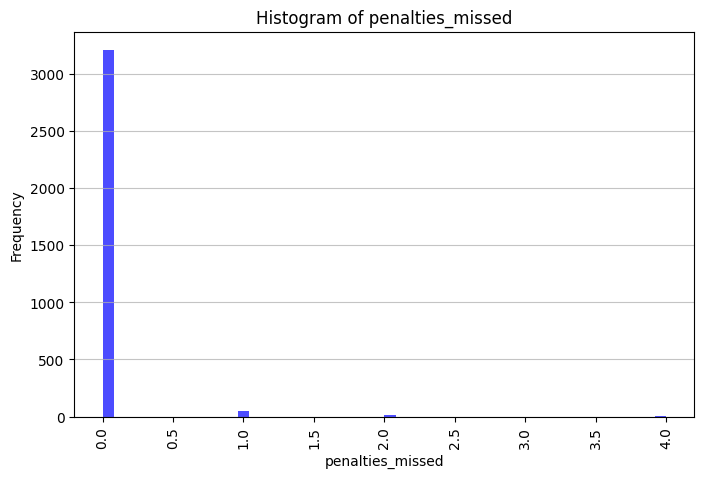

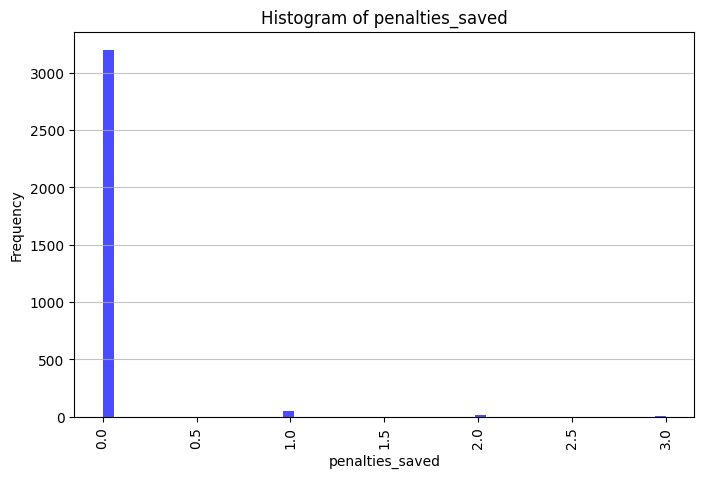

In [ ]:
# List of specific columns to plot
columns_to_plot = ['dribbled_past', 'fouls_committed', 'yellow_cards', 'yellow_red_cards', 'red_cards', 'penalties_won', 'penalties_committed', 'penalties_scored', 'penalties_missed', 'penalties_saved']
# all numeric columns:
# ['age', 'height', 'weight', 'appearances', 'lineups', 'minutes_played', 'rating', 'substitutions_in', 'substitutions_out', 'bench_appearances', 'total_shots', 'shots_on_target', 'total_goals', 'assists', 'goals_conceded', 'saves', 'total_passes', 'key_passes', 'pass_accuracy', 'total_tackles', 'blocks', 'interceptions', 'total_duels', 'duels_won', 'dribble_attempts', 'successful_dribbles', 'dribbled_past', 'fouls_drawn', 'fouls_committed', 'yellow_cards', 'yellow_red_cards', 'red_cards', 'penalties_won', 'penalties_committed', 'penalties_scored', 'penalties_missed', 'penalties_saved']
# for now i left up all the data i think i have a problem with and is not right

# before omri think some are ok:
#  ['rating', 'goals_conceded', 'saves', 'total_passes', 'key_passes', 'pass_accuracy', 'total_tackles', 'blocks', 'interceptions', 'total_duels', 'duels_won', 'dribble_attempts', 'successful_dribbles', 'dribbled_past', 'fouls_drawn', 'fouls_committed', 'yellow_cards', 'yellow_red_cards', 'red_cards', 'penalties_won', 'penalties_committed', 'penalties_scored', 'penalties_missed', 'penalties_saved']

# before fixing each plot after omri review:
# ['rating', 'goals_conceded', 'saves', 'pass_accuracy', 'total_tackles',  'dribbled_past', 'fouls_committed', 'yellow_cards', 'yellow_red_cards', 'red_cards', 'penalties_won', 'penalties_committed', 'penalties_scored', 'penalties_missed', 'penalties_saved']

for column in columns_to_plot:
    plt.figure(figsize=(8, 5))
    plt.hist(data[column].dropna(), bins=50, alpha=0.7, color='blue')  # Drop NaN values
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)  # Rotate x-axis labels
    plt.grid(axis='y', alpha=0.75)
    plt.show()

# # Plot histograms for the specified columns
# data[columns_to_plot].hist(figsize=(15, 10))  # Adjust figsize as needed
# plt.tight_layout()
# plt.show()



### check players raiting + appearences

In [6]:
print("Number of players with 0 appearances:", len(players_zero_appearances))

# Additional filter for players with NaN rating (regardless of appearances)
players_with_nan_rating = data[data['rating'].isna()]
print("Total number of players with NaN rating (regardless of appearances):", len(players_with_nan_rating))

# Players with 0 appearances and NaN rating
players_zero_appearances_nan_rating = players_zero_appearances[players_zero_appearances['rating'].isna()]
print("Number of players with 0 appearances and NaN rating:", len(players_zero_appearances_nan_rating))

# Players with more than 0 appearances and NaN rating
players_non_zero_appearances_nan_rating = players_non_zero_appearances[players_non_zero_appearances['rating'].isna()]
print("Number of players with more than 0 appearances and NaN rating:", len(players_non_zero_appearances_nan_rating))


Number of players with 0 appearances: 1176
Total number of players with NaN rating (regardless of appearances): 1195
Number of players with 0 appearances and NaN rating: 1151
Number of players with more than 0 appearances and NaN rating: 44


### players_non_zero_appearances + pass_accuracy 

In [ ]:
print("Number of players with non 0 appearances:", len(players_non_zero_appearances))
# Count the players with a pass accuracy of 0
zero_pass_accuracy_count = len(players_non_zero_appearances[players_non_zero_appearances['pass_accuracy'] == 0])
print("Number of players with 0% pass accuracy:", zero_pass_accuracy_count)

# Count the players with a pass accuracy greater than 0
non_zero_pass_accuracy_count = len(players_non_zero_appearances[players_non_zero_appearances['pass_accuracy'] > 0])
print("Number of players with non-zero pass accuracy:", non_zero_pass_accuracy_count)

# Filter out players with pass accuracy of 0 for the plot
non_zero_pass_accuracy = players_non_zero_appearances[players_non_zero_appearances['pass_accuracy'] > 0]

# Group by pass accuracy and count the number of players for each accuracy level
pass_accuracy_counts = non_zero_pass_accuracy['pass_accuracy'].value_counts().sort_index()

# Plotting the distribution of pass accuracy percentages (excluding 0%)
plt.figure(figsize=(12, 6))
plt.bar(pass_accuracy_counts.index, pass_accuracy_counts.values, width=0.5)
plt.xlabel('Pass Accuracy (%)')
plt.ylabel('Number of Players')
plt.title('Distribution of Pass Accuracy for Players with Non-Zero Appearances (Excluding 0%)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### players_non_zero_appearances + total_tackles

Number of players with non-zero appearances: 2094
Number of field players with 0 total tackles: 176
Number of field players with non-zero total tackles: 1766


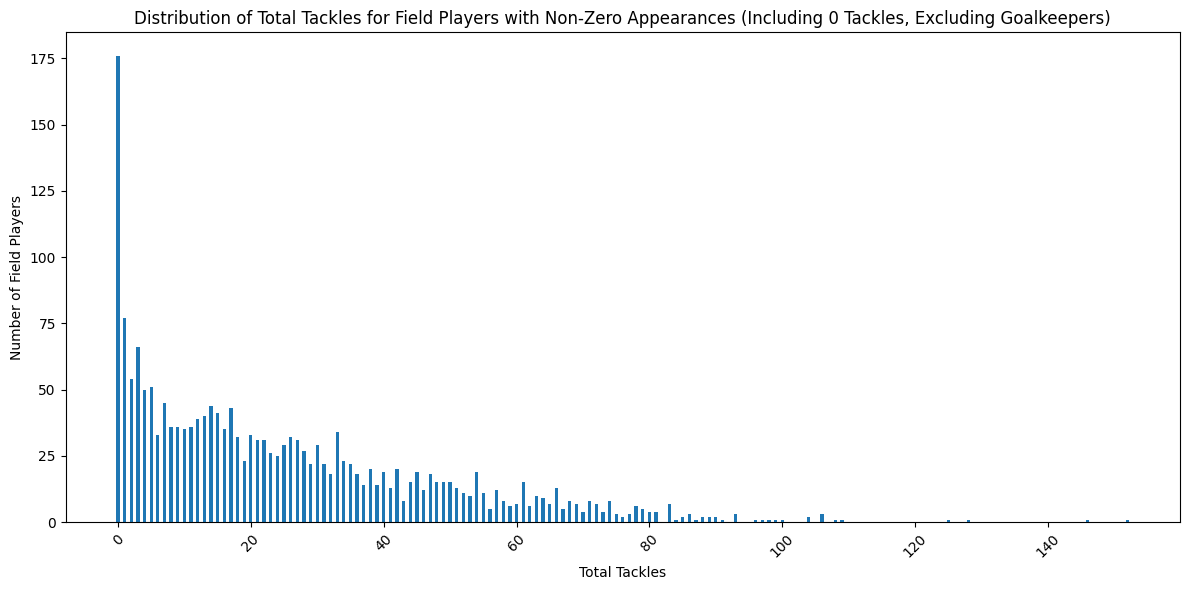

In [63]:
# Print total number of players with non-zero appearances
print("Number of players with non-zero appearances:", len(players_non_zero_appearances))

# Filter out goalkeepers from players_non_zero_appearances
field_players_non_zero_appearances = players_non_zero_appearances[players_non_zero_appearances['position'] != 'Goalkeeper']

# Count the players with 0 total tackles (excluding goalkeepers)
zero_tackles_count = len(field_players_non_zero_appearances[field_players_non_zero_appearances['total_tackles'] == 0])
print("Number of field players with 0 total tackles:", zero_tackles_count)

# Count the players with more than 0 total tackles (excluding goalkeepers)
non_zero_tackles_count = len(field_players_non_zero_appearances[field_players_non_zero_appearances['total_tackles'] > 0])
print("Number of field players with non-zero total tackles:", non_zero_tackles_count)

# Group by total tackles and count the number of players for each tackle level (including 0 tackles, excluding goalkeepers)
tackles_counts = field_players_non_zero_appearances['total_tackles'].value_counts().sort_index()

# Plotting the distribution of total tackles (including 0 tackles, excluding goalkeepers)
plt.figure(figsize=(12, 6))
plt.bar(tackles_counts.index, tackles_counts.values, width=0.5)
plt.xlabel('Total Tackles')
plt.ylabel('Number of Field Players')
plt.title('Distribution of Total Tackles for Field Players with Non-Zero Appearances (Including 0 Tackles, Excluding Goalkeepers)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Filter for Goalkeepers with Goals Conceded


In [ ]:
# filter for goalkeapers + goals_conceded 
goalkeepers = data[data['position'] == 'Goalkeeper']

# Filter for all goalkeepers
all_goalkeepers = data[data['position'] == 'Goalkeeper']
num_all_goalkeepers = len(all_goalkeepers)
print("Total number of goalkeepers:", num_all_goalkeepers)

# Plotting the number of goals conceded by each goalkeeper (all goalkeepers)
plt.figure(figsize=(12, 20))
plt.barh(all_goalkeepers['firstname'] + ' ' + all_goalkeepers['lastname'], all_goalkeepers['goals_conceded'])
plt.ylabel('Goalkeepers')
plt.xlabel('Goals Conceded')
plt.title(f'Number of Goals Conceded by Each Goalkeeper (Total: {num_all_goalkeepers})')
plt.tight_layout()
plt.show()

# Filter for goalkeepers who have played games (appearances > 0)
goalkeepers_played = data[(data['position'] == 'Goalkeeper') & (data['appearances'] > 0)]
num_goalkeepers_played = len(goalkeepers_played)
print("Number of goalkeepers who played games:", num_goalkeepers_played)

# Plotting the number of goals conceded by each goalkeeper who played games
plt.figure(figsize=(12, 20))
plt.barh(goalkeepers_played['firstname'] + ' ' + goalkeepers_played['lastname'], goalkeepers_played['goals_conceded'])
plt.ylabel('Goalkeepers')
plt.xlabel('Goals Conceded')
plt.title(f'Number of Goals Conceded by Each Goalkeeper Who Played Games (Total: {num_goalkeepers_played})')
plt.tight_layout()
plt.show()

### Filter for Goalkeepers with saves


In [ ]:
# Filter for all goalkeepers + saves
all_goalkeepers = data[data['position'] == 'Goalkeeper']
num_all_goalkeepers = len(all_goalkeepers)
print("Total number of goalkeepers:", num_all_goalkeepers)

# Plotting the number of saves by each goalkeeper (all goalkeepers)
plt.figure(figsize=(12, 20))
plt.barh(all_goalkeepers['firstname'] + ' ' + all_goalkeepers['lastname'], all_goalkeepers['saves'])
plt.ylabel('Goalkeepers')
plt.xlabel('Saves')
plt.title(f'Number of Saves by Each Goalkeeper (Total: {num_all_goalkeepers})')
plt.tight_layout()
plt.show()

# Filter for goalkeepers who have played games (appearances > 0)
goalkeepers_played = data[(data['position'] == 'Goalkeeper') & (data['appearances'] > 0)]
num_goalkeepers_played = len(goalkeepers_played)
print("Number of goalkeepers who played games:", num_goalkeepers_played)

# Plotting the number of saves by each goalkeeper who played games
plt.figure(figsize=(12, 20))
plt.barh(goalkeepers_played['firstname'] + ' ' + goalkeepers_played['lastname'], goalkeepers_played['saves'])
plt.ylabel('Goalkeepers')
plt.xlabel('Saves')
plt.title(f'Number of Saves by Each Goalkeeper Who Played Games (Total: {num_goalkeepers_played})')
plt.tight_layout()
plt.show()

### players_non_zero_appearances + Dribbled past

Number of players with non-zero appearances: 2094
Number of players with 0 dribbled past: 2094
Number of players with non-zero dribbled past: 0


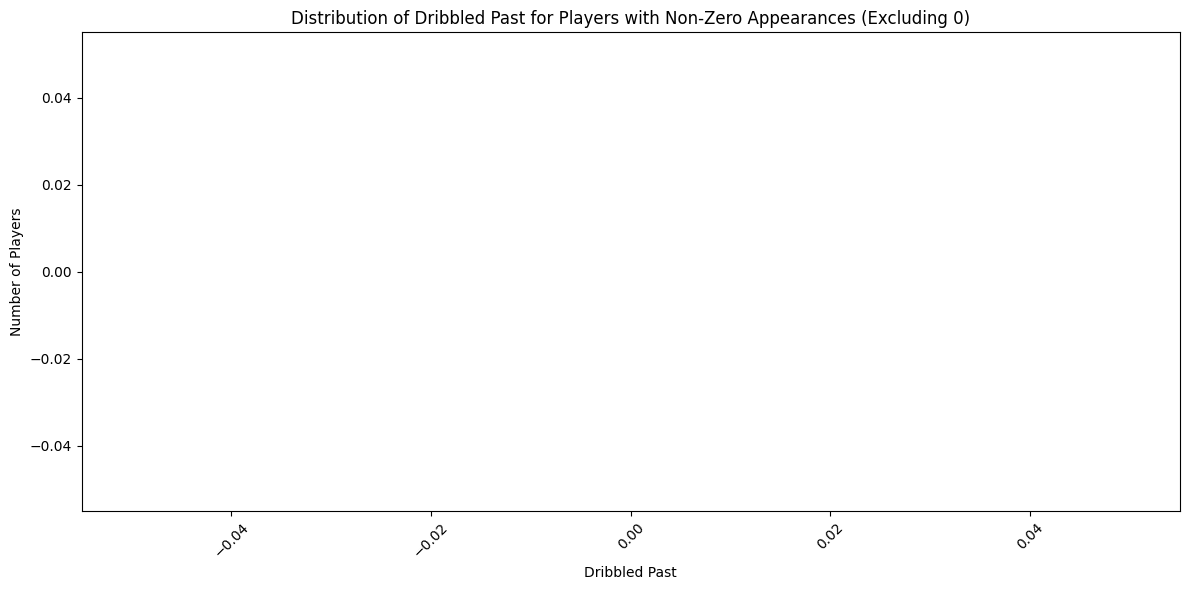

In [7]:
# Print the number of players with non-zero appearances
print("Number of players with non-zero appearances:", len(players_non_zero_appearances))

# Count the players with a Dribbled Past value of 0
zero_dribbled_past_count = len(players_non_zero_appearances[players_non_zero_appearances['dribbled_past'] == 0])
print("Number of players with 0 dribbled past:", zero_dribbled_past_count)

# Count the players with a Dribbled Past value greater than 0
non_zero_dribbled_past_count = len(players_non_zero_appearances[players_non_zero_appearances['dribbled_past'] > 0])
print("Number of players with non-zero dribbled past:", non_zero_dribbled_past_count)

# Filter out players with Dribbled Past of 0 for the plot
non_zero_dribbled_past = players_non_zero_appearances[players_non_zero_appearances['dribbled_past'] > 0]

# Group by Dribbled Past and count the number of players for each level
dribbled_past_counts = non_zero_dribbled_past['dribbled_past'].value_counts().sort_index()

# Plotting the distribution of Dribbled Past (excluding 0)
plt.figure(figsize=(12, 6))
plt.bar(dribbled_past_counts.index, dribbled_past_counts.values, width=0.5)
plt.xlabel('Dribbled Past')
plt.ylabel('Number of Players')
plt.title('Distribution of Dribbled Past for Players with Non-Zero Appearances (Excluding 0)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### penalties data

In [66]:
# Group by season and calculate the sum for each specified column
penalties_and_cards_summary = players_non_zero_appearances.groupby('season')[
    ['penalties_scored', 'penalties_missed', 'penalties_saved', 'penalties_committed', 
     'yellow_cards', 'yellow_red_cards', 'red_cards', 'penalties_won']
].sum()

# Print the result
print(penalties_and_cards_summary)




        penalties_scored  penalties_missed  penalties_saved  \
season                                                        
2020                 101                21               28   
2021                  78                18               15   
2022                  72                25               28   
2023                  95                11               10   

        penalties_committed  yellow_cards  yellow_red_cards  red_cards  \
season                                                                   
2020                      0          1101                15         33   
2021                      0          1176                17         21   
2022                      0          1335                12         17   
2023                      0          1567                28         27   

        penalties_won  
season                 
2020                0  
2021                0  
2022                0  
2023                0  


### hight and weight problems

In [73]:
# Print the number of players with non-zero appearances
print("Number of players with non-zero appearances:", len(players_non_zero_appearances))

# Count players with missing height
missing_height_count = len(players_non_zero_appearances[players_non_zero_appearances['height'].isna()])
print("Number of players with non-zero appearances and missing height:", missing_height_count)

# Count players with missing weight
missing_weight_count = len(players_non_zero_appearances[players_non_zero_appearances['weight'].isna()])
print("Number of players with non-zero appearances and missing weight:", missing_weight_count)

# Count players with missing age
missing_age_count = len(players_non_zero_appearances[players_non_zero_appearances['age'].isna()])
print("Number of players with non-zero appearances and missing age:", missing_age_count)



Number of players with non-zero appearances: 2094
Number of players with non-zero appearances and missing height: 37
Number of players with non-zero appearances and missing weight: 141
Number of players with non-zero appearances and missing age: 0


# heatmap + corelations

In [ ]:
# heatmap
plt.figure(figsize=(50,50))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()